In [83]:
import datetime
import missingno as msno
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [44]:
full_df = pd.read_csv("../data/zonal-means-aggregate-200910-201912.csv")
full_df

location_period_id  year  month      lst_3      lst_2      lst_1  \
0                      92  2010      1  32.357544  33.726624  34.437530   
1                      92  2010      2  33.726624  34.437530  35.159393   
2                      92  2010      3  34.437530  35.159393  37.299316   
3                      92  2010      4  35.159393  37.299316  37.331665   
4                      92  2010      5  37.299316  37.331665  39.188446   
...                   ...   ...    ...        ...        ...        ...   
57634               16697  2019      8  39.427277  41.711395  29.873108   
57635               16697  2019      9  41.711395  29.873108  28.330505   
57636               16697  2019     10  29.873108  28.330505  32.087708   
57637               16697  2019     11  28.330505  32.087708  28.918060   
57638               16697  2019     12  32.087708  28.918060  29.032227   

           lst_0    precip_3    precip_2    precip_1    precip_0       sm_3  \
0      35.159393  288.192780   61.916030    2.243044    0.277970  75.846150   
1      37.299316   61.916030    2.243044    0.277970    0.205065  55.673077   
2      37.331665    2.243044    0.277970    0.205065    0.414880  25.692308   
3      39.188446    0.277970    0.205065    0.414880    6.336623  11.038462   
4      38.275238    0.205065    0.414880    6.336623  106.946400   5.673077   
...          ...         ...         ...         ...         ...        ...   
57634  28.330505  146.727780  308.896500  312.504060  310.206630  63.965520   
57635  32.087708  308.896500  312.504060  310.206630  243.551130  90.206894   
57636  28.918060  312.504060  310.206630  243.551130  207.554380  89.000000   
57637  29.032227  310.206630  243.551130  207.554380   92.452390  85.183910   
57638  30.505737  243.551130  207.554380   92.452390   18.793009  68.770120   

            sm_2       sm_1       sm_0  outbreak  
0      55.673077  25.692308  11.038462         0  
1      25.692308  11.038462   5.673077         0  
2      11.038462   5.673077   1.826923         0  
3       5.673077   1.826923   1.634615         0  
4       1.826923   1.634615  23.211538         0  
...          ...        ...        ...       ...  
57634  90.206894  89.000000  85.183910         0  
57635  89.000000  85.183910  68.770120         0  
57636  85.183910  68.770120  50.137930         0  
57637  68.770120  50.137930  44.494250         0  
57638  50.137930  44.494250  32.643677         0  

[57639 rows x 16 columns]

In [64]:
# create new date column from month and year, assign arbitrary day value of 1
full_df["date"] = pd.to_datetime(full_df[["year", "month"]].assign(Day=1))
full_df

location_period_id  year  month      lst_3      lst_2      lst_1  \
0                      92  2010      1  32.357544  33.726624  34.437530   
1                      92  2010      2  33.726624  34.437530  35.159393   
2                      92  2010      3  34.437530  35.159393  37.299316   
3                      92  2010      4  35.159393  37.299316  37.331665   
4                      92  2010      5  37.299316  37.331665  39.188446   
...                   ...   ...    ...        ...        ...        ...   
57634               16697  2019      8  39.427277  41.711395  29.873108   
57635               16697  2019      9  41.711395  29.873108  28.330505   
57636               16697  2019     10  29.873108  28.330505  32.087708   
57637               16697  2019     11  28.330505  32.087708  28.918060   
57638               16697  2019     12  32.087708  28.918060  29.032227   

           lst_0    precip_3    precip_2    precip_1    precip_0       sm_3  \
0      35.159393  288.192780   61.916030    2.243044    0.277970  75.846150   
1      37.299316   61.916030    2.243044    0.277970    0.205065  55.673077   
2      37.331665    2.243044    0.277970    0.205065    0.414880  25.692308   
3      39.188446    0.277970    0.205065    0.414880    6.336623  11.038462   
4      38.275238    0.205065    0.414880    6.336623  106.946400   5.673077   
...          ...         ...         ...         ...         ...        ...   
57634  28.330505  146.727780  308.896500  312.504060  310.206630  63.965520   
57635  32.087708  308.896500  312.504060  310.206630  243.551130  90.206894   
57636  28.918060  312.504060  310.206630  243.551130  207.554380  89.000000   
57637  29.032227  310.206630  243.551130  207.554380   92.452390  85.183910   
57638  30.505737  243.551130  207.554380   92.452390   18.793009  68.770120   

            sm_2       sm_1       sm_0  outbreak       date  
0      55.673077  25.692308  11.038462         0 2010-01-01  
1      25.692308  11.038462   5.673077         0 2010-02-01  
2      11.038462   5.673077   1.826923         0 2010-03-01  
3       5.673077   1.826923   1.634615         0 2010-04-01  
4       1.826923   1.634615  23.211538         0 2010-05-01  
...          ...        ...        ...       ...        ...  
57634  90.206894  89.000000  85.183910         0 2019-08-01  
57635  89.000000  85.183910  68.770120         0 2019-09-01  
57636  85.183910  68.770120  50.137930         0 2019-10-01  
57637  68.770120  50.137930  44.494250         0 2019-11-01  
57638  50.137930  44.494250  32.643677         0 2019-12-01  

[57639 rows x 17 columns]

Let's explore the entire dataset for missing observations: 
missing_values = full_df.isna()
missing_values

In [58]:
missing_values = full_df.isna()
missing_values

location_period_id   year  month  lst_3  lst_2  lst_1  lst_0  precip_3  \
0                   False  False  False  False  False  False  False     False   
1                   False  False  False  False  False  False  False     False   
2                   False  False  False  False  False  False  False     False   
3                   False  False  False  False  False  False  False     False   
4                   False  False  False  False  False  False  False     False   
...                   ...    ...    ...    ...    ...    ...    ...       ...   
57634               False  False  False  False  False  False  False     False   
57635               False  False  False  False  False  False  False     False   
57636               False  False  False  False  False  False  False     False   
57637               False  False  False  False  False  False  False     False   
57638               False  False  False  False  False  False  False     False   

       precip_2  precip_1  precip_0   sm_3   sm_2   sm_1   sm_0  outbreak  \
0         False     False     False  False  False  False  False     False   
1         False     False     False  False  False  False  False     False   
2         False     False     False  False  False  False  False     False   
3         False     False     False  False  False  False  False     False   
4         False     False     False  False  False  False  False     False   
...         ...       ...       ...    ...    ...    ...    ...       ...   
57634     False     False     False  False  False  False  False     False   
57635     False     False     False  False  False  False  False     False   
57636     False     False     False  False  False  False  False     False   
57637     False     False     False  False  False  False  False     False   
57638     False     False     False  False  False  False  False     False   

        date  
0      False  
1      False  
2      False  
3      False  
4      False  
...      ...  
57634  False  
57635  False  
57636  False  
57637  False  
57638  False  

[57639 rows x 17 columns]

Now let's explore some of the missing data

<Axes: >

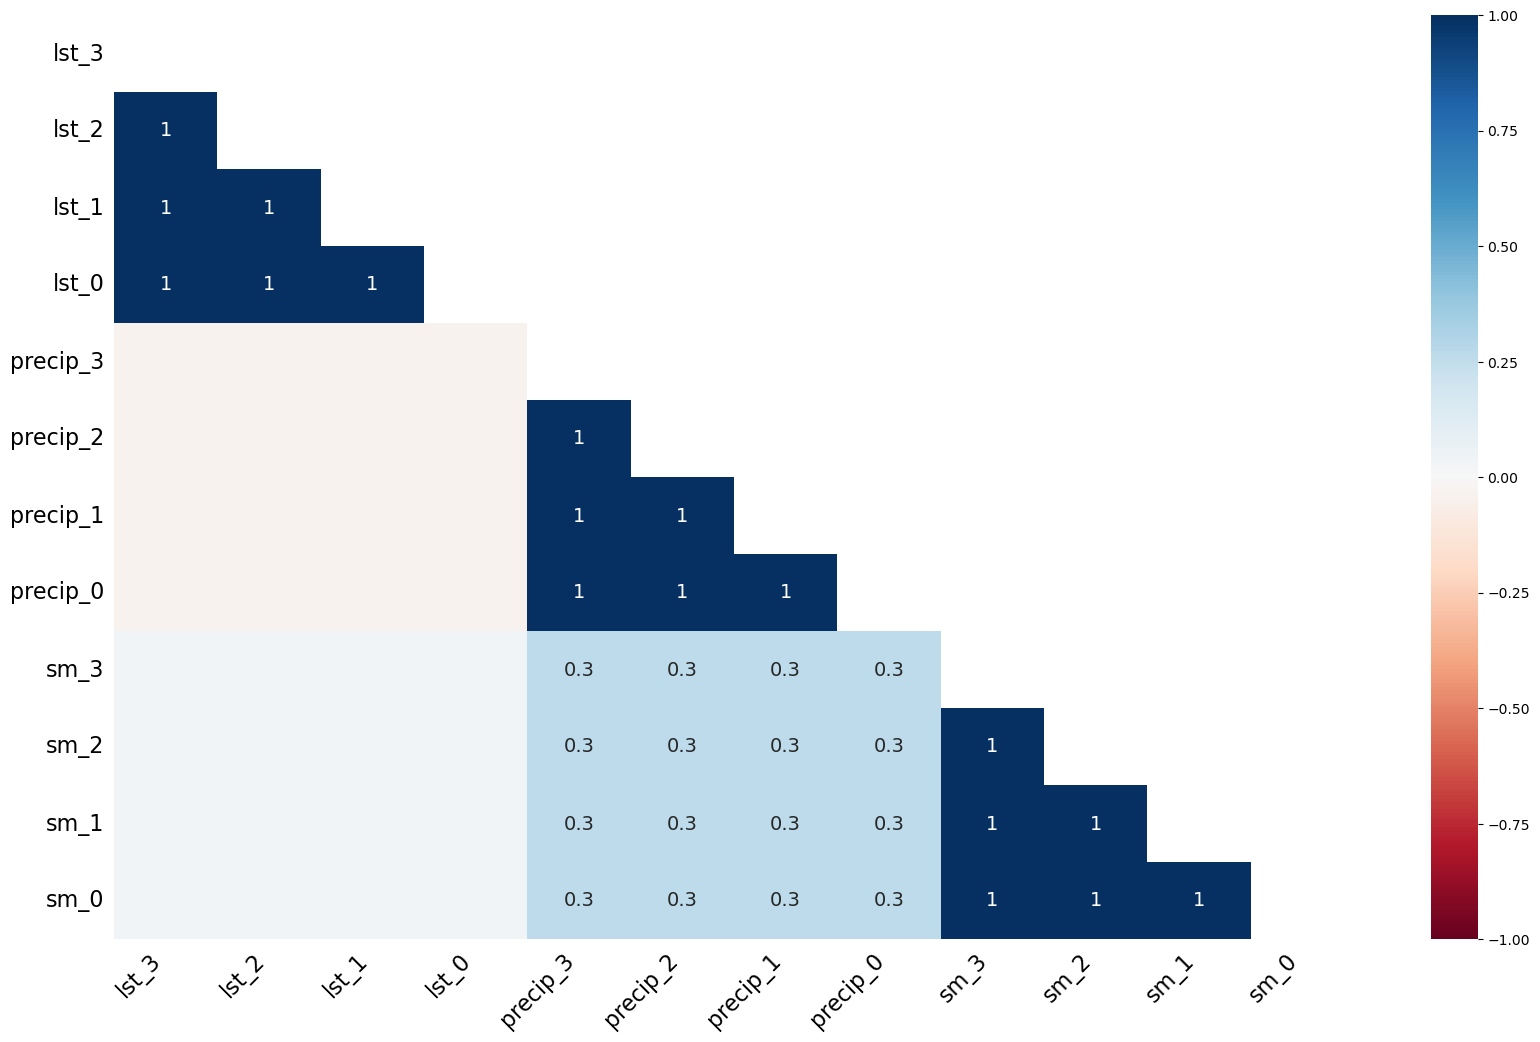

In [70]:
msno.heatmap(full_df)

<Axes: >

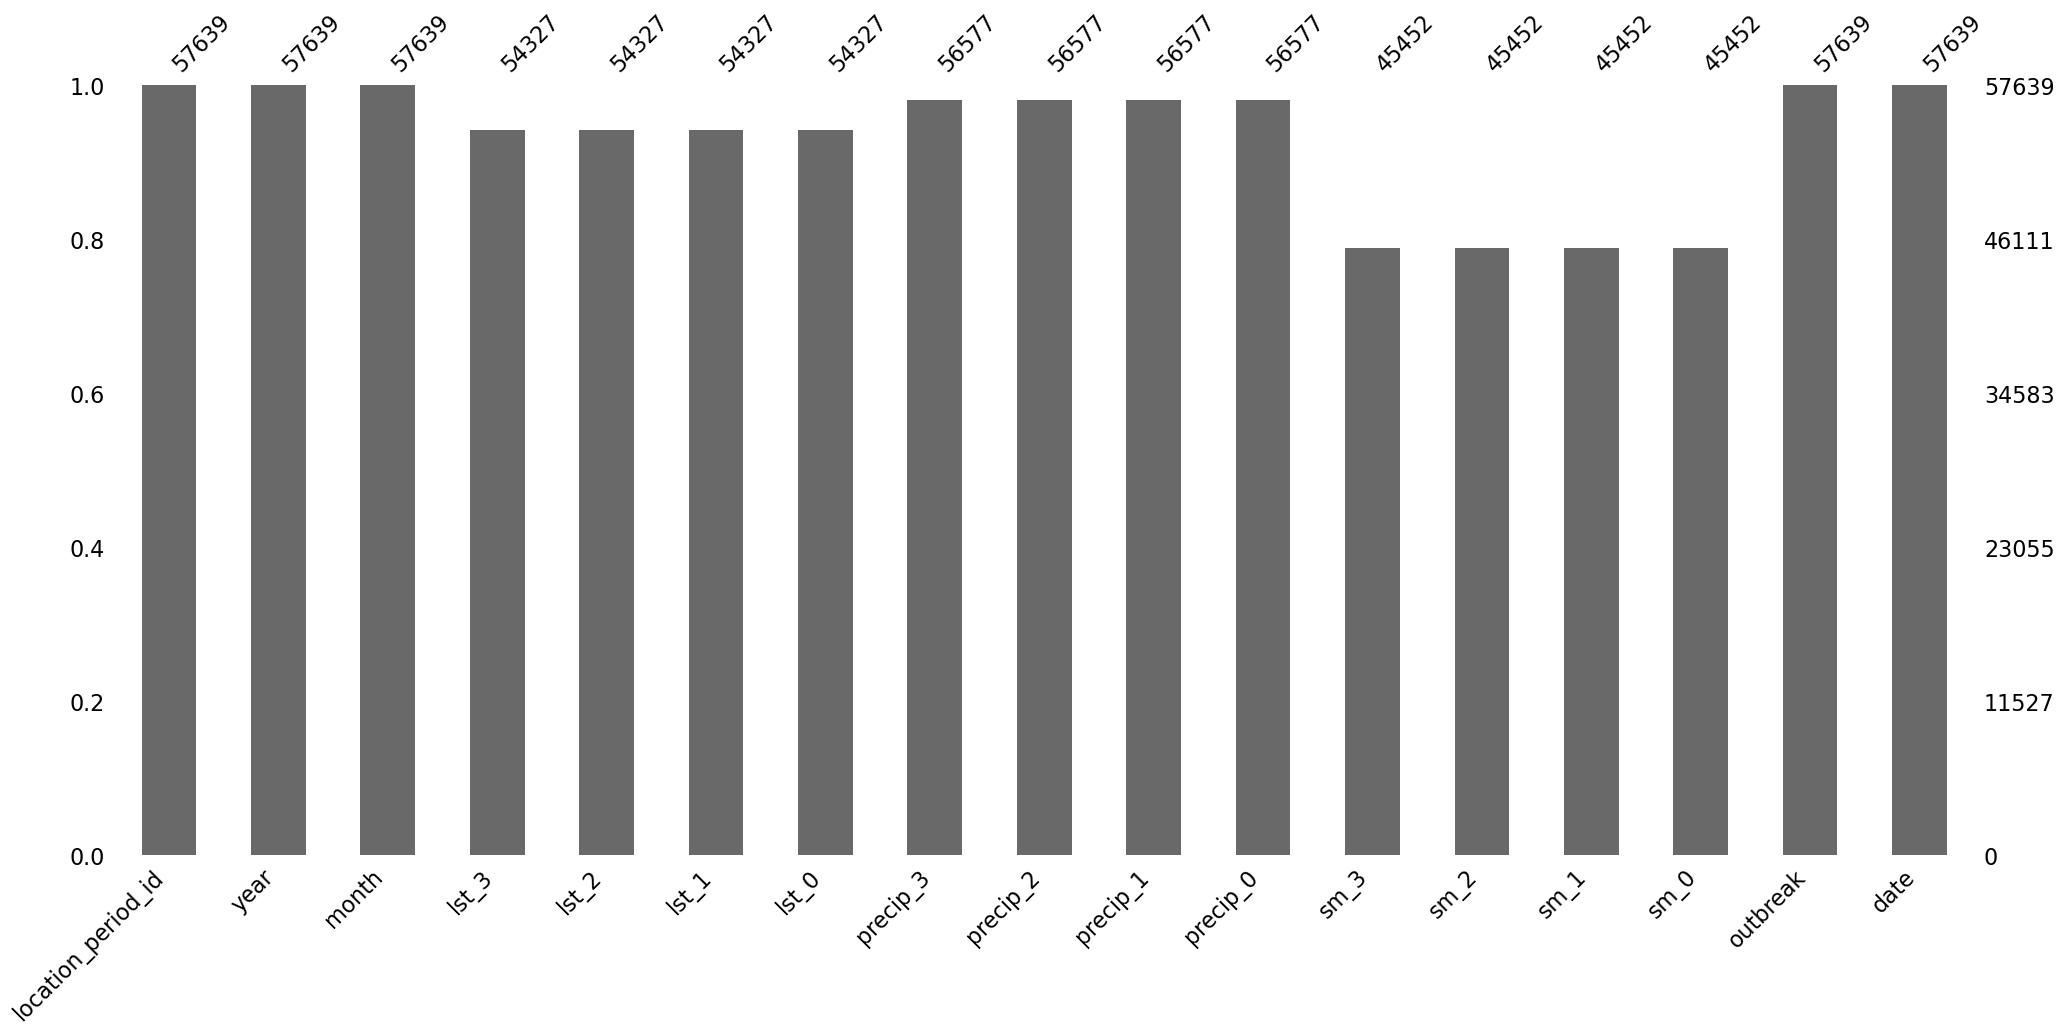

In [78]:
msno.bar(full_df)

Let's see if we can get a better idea of how large these gaps in observations over time are

In [84]:
# msno.matrix(full_df, freq="M")

In [ ]:
# msno.matrix(full_df.set_index(pd.period_range("2009-01-01", "2019-12-01", freq="M")))

Let's first explore the distribution of the `lst_0` observations

In [46]:
lst_0_ts = px.scatter(full_df, x="date", y="lst_0")
lst_0_ts.show()

/opt/homebrew/Caskroom/miniforge/base/envs/geo-ds-cholera/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [53]:
print("Total number of missing lst_0 values are: ")
full_df["lst_0"].isna().sum()

Total number of missing lst_0 values are: 


3312

In [85]:
# forward fill
ffill_imputed = full_df.copy(deep=True)
ffill_imputed.fillna(method="ffill", inplace=True)

/var/folders/s9/q707z2_n1sjd38cvg62wg4c40000gn/T/ipykernel_41703/3187397490.py:3: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



<Axes: title={'center': 'LST'}>

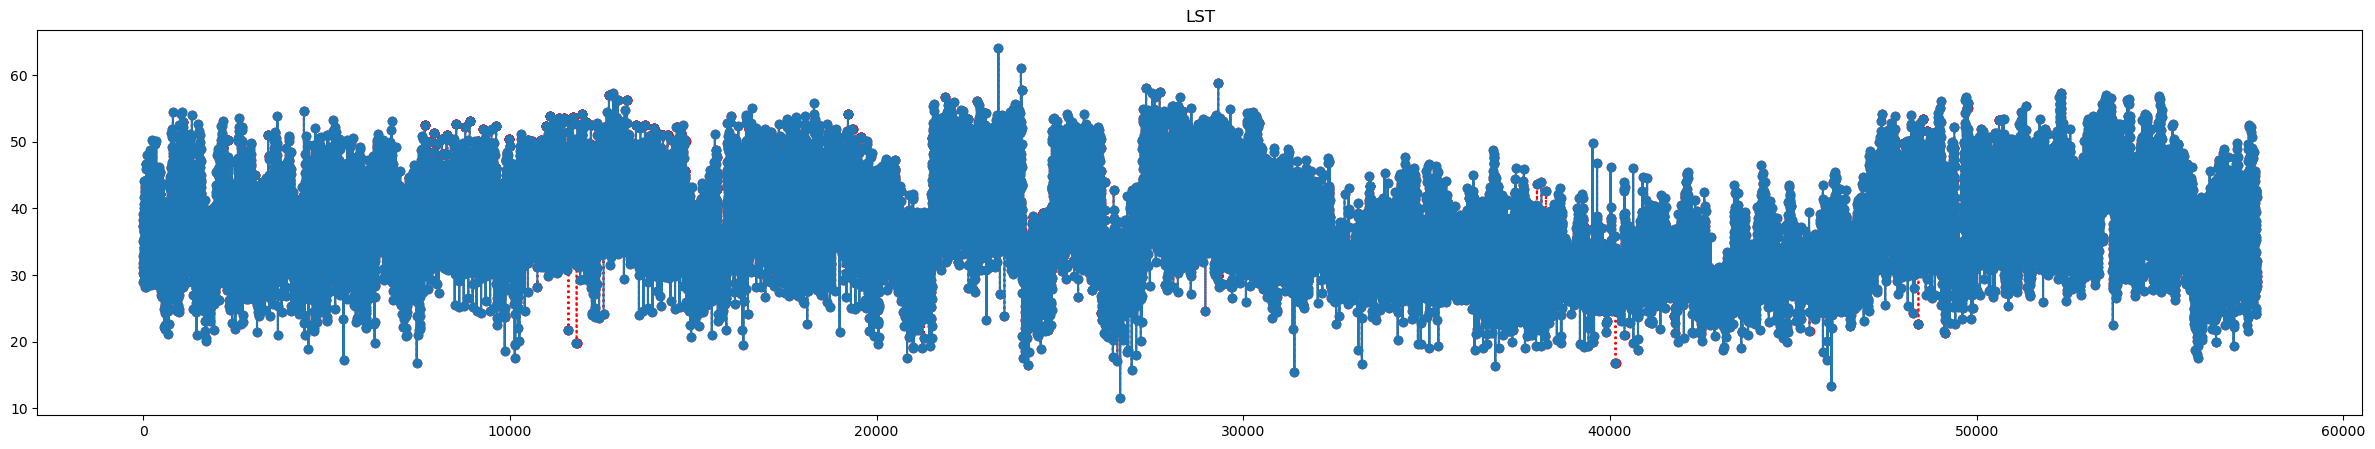

In [87]:
ffill_imputed["lst_0"].plot(
    color="red", marker="o", linestyle="dotted", figsize=(30, 5)
)

full_df["lst_0"].plot(title="LST", marker="o", figsize=(30, 5))

Now, we'll explore the distribution of the `precip_0` observations

In [31]:
precip_0_ts = px.scatter(full_df, x="date", y="precip_0")
precip_0_ts.show()

/opt/homebrew/Caskroom/miniforge/base/envs/geo-ds-cholera/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [32]:
missing_values_precip = full_df["precip_0"].isna().sum()
print(missing_values_precip)

1062


Finally, we'll explore the distribution of the `sm_0` observations

In [28]:
sm_0_ts = px.scatter(full_df, x="date", y="sm_0")
sm_0_ts.show()

/opt/homebrew/Caskroom/miniforge/base/envs/geo-ds-cholera/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

